# Recommender Systems

### Libraries

In [126]:
import json
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, accuracy, NormalPredictor, KNNBasic, SVD
from surprise.model_selection import train_test_split
from collections import Counter, defaultdict
from utils import load_filtered_data

### Reviews data

In [127]:
# major variables

city = 'Springfield'
city_data = load_filtered_data(city)

In [128]:
# data frame of business reviews by users

reviews = city_data['review'][['review_id', 'business_id', 'user_id', 'stars']]
reviews = reviews.groupby(['user_id', 'business_id'])['stars'].mean().reset_index()
reviews.columns = ['user_id', 'business_id', 'rating']

In [129]:
reviews.sample(5)

user_id             business_id  rating
4336   ONlzjNW4Zc757SdszJAWkw  YpcuJI8R4nHeKYZVPOFMpg     5.0
1959   AxjzdOvzzQU4FS6A5Zrptg  ZXKGcX3TIw_Ao3EgkenNvw     1.0
9376   ppsm8EDKjA1fp1yTCP3RrQ  NaA1lTPxouNLq-zFI3IOYA     2.0
2812   FZzwW_tAIzslzzlfv-VNVA  V1l_59RO8n_WT3WMK8jOLg     4.0
10696  xPrz0I9x-WkrqAkavxbWRg  J88CJWJi7UvpUiBBrRS0gA     5.0

In [130]:
# number of ratings

len(reviews['rating'])

11145

In [131]:
# number of users who have reviewed

len(reviews['user_id'].unique())

7350

In [132]:
# ratings statistics

reviews['rating'].describe()

count    11145.000000
mean         3.170151
std          1.620381
min          1.000000
25%          1.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

<AxesSubplot: >

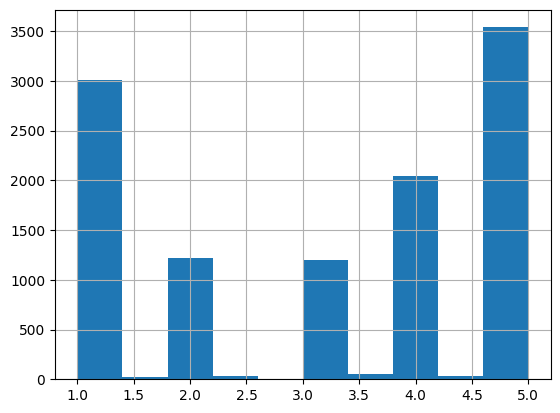

In [133]:
# ratings distribution

reviews['rating'].hist()

### User-business matrix

In [134]:
# city matrix

city_matrix = reviews.pivot(index='user_id', columns='business_id', values='rating')

In [135]:
city_matrix.sample(5)

business_id             -2HaAaQODTx0sr2srL553Q  -Ll6x0_5Fr_bA72f7u4ngg  \
user_id                                                                  
s6YkpsUn9R5dwLLQNefUqg                     NaN                     NaN   
UJ_LL44XHkRY9Ie1j2MZ7w                     NaN                     NaN   
_Sje80zgwP5owUfVMOdUJw                     NaN                     NaN   
_KIjfsKgBog-cg2ZrZd_Bw                     NaN                     NaN   
kSMsZV3xi9I70zvWlHeDaQ                     NaN                     NaN   

business_id             -PU5on8H21jZOqSXCmxLJQ  -SP57kb0YH5OVygMepc-mg  \
user_id                                                                  
s6YkpsUn9R5dwLLQNefUqg                     NaN                     NaN   
UJ_LL44XHkRY9Ie1j2MZ7w                     NaN                     NaN   
_Sje80zgwP5owUfVMOdUJw                     NaN                     NaN   
_KIjfsKgBog-cg2ZrZd_Bw                     NaN                     NaN   
kSMsZV3xi9I70zvWlHeDaQ                     NaN                     NaN   

business_id             -Y3htUtPT7AMBgjx9R9PhQ  -wpjPXundFyZCm9khW2wLg  \
user_id                                                                  
s6YkpsUn9R5dwLLQNefUqg                     NaN                     NaN   
UJ_LL44XHkRY9Ie1j2MZ7w                     NaN                     NaN   
_Sje80zgwP5owUfVMOdUJw                     NaN                     NaN   
_KIjfsKgBog-cg2ZrZd_Bw                     NaN                     NaN   
kSMsZV3xi9I70zvWlHeDaQ                     NaN                     NaN   

business_id             07aiOK7W40KIAgEYeHES_Q  0GYqOZwfs9eZGLdb5HCFLQ  \
user_id                                                                  
s6YkpsUn9R5dwLLQNefUqg                     NaN                     NaN   
UJ_LL44XHkRY9Ie1j2MZ7w                     NaN                     5.0   
_Sje80zgwP5owUfVMOdUJw                     NaN                     NaN   
_KIjfsKgBog-cg2ZrZd_Bw                     NaN                     NaN   
kSMsZV3xi9I70zvWlHeDaQ                     NaN                     NaN   

business_id             0PwifSf0hCjUHyBrCVW8Vg  0XHO9Af7O0GQ6ynGmJmjJw  ...  \
user_id                                                                 ...   
s6YkpsUn9R5dwLLQNefUqg                     NaN                     NaN  ...   
UJ_LL44XHkRY9Ie1j2MZ7w                     NaN                     NaN  ...   
_Sje80zgwP5owUfVMOdUJw                     NaN                     NaN  ...   
_KIjfsKgBog-cg2ZrZd_Bw                     NaN                     NaN  ...   
kSMsZV3xi9I70zvWlHeDaQ                     NaN                     NaN  ...   

business_id             yYbKiItwE3eQIP_yI_26Ug  yamAA4kSOegaxFjhGhI0OQ  \
user_id                                                                  
s6YkpsUn9R5dwLLQNefUqg                     NaN                     NaN   
UJ_LL44XHkRY9Ie1j2MZ7w                     NaN                     NaN   
_Sje80zgwP5owUfVMOdUJw                     NaN                     NaN   
_KIjfsKgBog-cg2ZrZd_Bw                     NaN                     NaN   
kSMsZV3xi9I70zvWlHeDaQ                     NaN                     NaN   

business_id             yf1fXCSYCKvUGUgv5KaInA  yu59hTO1Qxopb-cIqCVoaQ  \
user_id                                                                  
s6YkpsUn9R5dwLLQNefUqg                     NaN                     NaN   
UJ_LL44XHkRY9Ie1j2MZ7w                     NaN                     NaN   
_Sje80zgwP5owUfVMOdUJw                     NaN                     NaN   
_KIjfsKgBog-cg2ZrZd_Bw                     NaN                     NaN   
kSMsZV3xi9I70zvWlHeDaQ                     NaN                     NaN   

business_id             yyGp1_3i_zhfpBVIY4Xaww  z0wMbtkOYQoErR5wHWAuzw  \
user_id                                                                  
s6YkpsUn9R5dwLLQNefUqg                     NaN                     NaN   
UJ_LL44XHkRY9Ie1j2MZ7w                     NaN                     NaN   
_Sje80zgwP5owUfVMOdUJw              

In [136]:
# city matrix sparsity

print(f"{city_matrix.notnull().sum().sum() / (city_matrix.shape[0] * city_matrix.shape[1]):.2%}")

0.39%


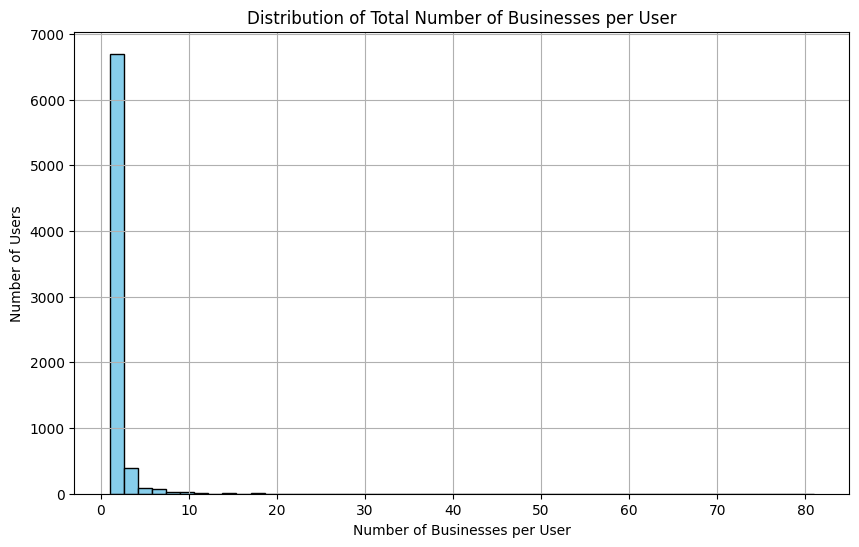

In [137]:
# distribution of total number of items per user

businesses_per_user = city_matrix.notnull().sum(axis=1)
plt.figure(figsize=(10, 6))
plt.hist(businesses_per_user, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Number of Businesses per User')
plt.xlabel('Number of Businesses per User')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

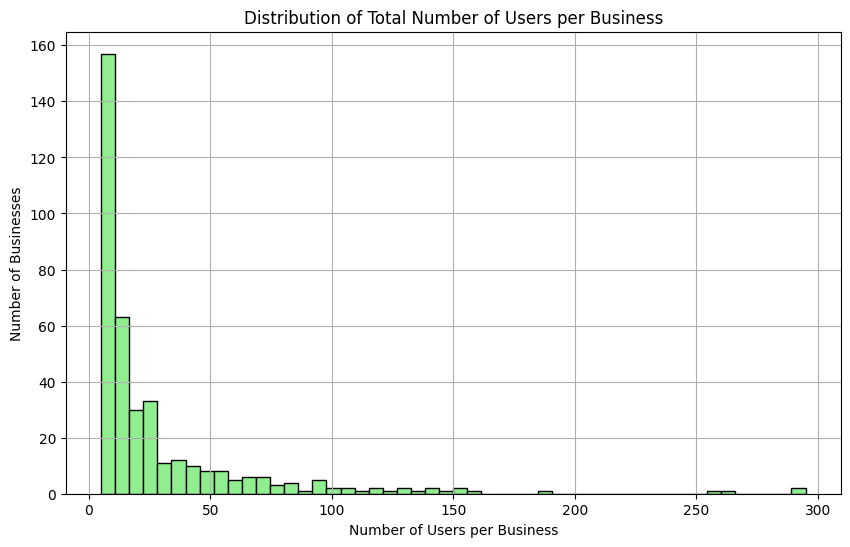

In [138]:
# distribution of total number of users per business

users_per_business = city_matrix.notnull().sum()
plt.figure(figsize=(10, 6))
plt.hist(users_per_business, bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Total Number of Users per Business')
plt.xlabel('Number of Users per Business')
plt.ylabel('Number of Businesses')
plt.grid(True)
plt.show()

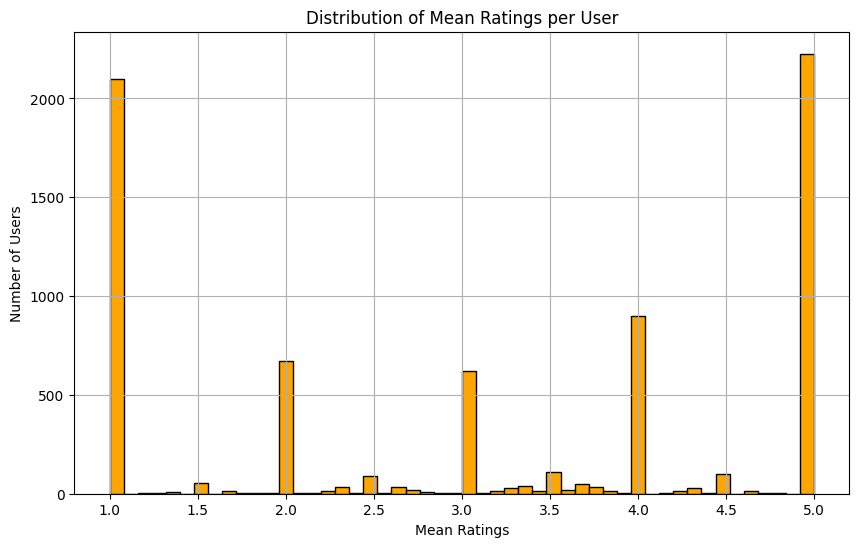

In [139]:
# distribution of mean ratings per user

mean_ratings_per_user = city_matrix.mean(axis=1)
plt.figure(figsize=(10, 6))
plt.hist(mean_ratings_per_user, bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Mean Ratings per User')
plt.xlabel('Mean Ratings')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

### Community matrices

In [140]:
# user-business matrix for each community

connection = 'priority_combined'
with open(f'communities/{city}_{connection}_communities.json') as f:
    data = json.load(f)

community_matrices = {}
for i, community in enumerate(data['communities']):
    community_matrices[i] = reviews[reviews['user_id'].isin(community)]
    community_matrices[i] = community_matrices[i].pivot_table(index='user_id', columns='business_id', values='rating')

In [141]:
community_matrices[0].sample(5)

business_id             -2HaAaQODTx0sr2srL553Q  -PU5on8H21jZOqSXCmxLJQ  \
user_id                                                                  
B29rjYBW-ZsAtVn3cmCPQg                     NaN                     NaN   
fMg591KP-lXkzQw0uSDh2w                     NaN                     NaN   
pE4rk3ia1xAElYILJ05GNQ                     NaN                     NaN   
UZomXUh3X3o9CW2e1hLd9Q                     NaN                     NaN   
1rshnzl8c6FsVqT_bc1PNQ                     NaN                     NaN   

business_id             -SP57kb0YH5OVygMepc-mg  -Y3htUtPT7AMBgjx9R9PhQ  \
user_id                                                                  
B29rjYBW-ZsAtVn3cmCPQg                     NaN                     NaN   
fMg591KP-lXkzQw0uSDh2w                     NaN                     NaN   
pE4rk3ia1xAElYILJ05GNQ                     NaN                     NaN   
UZomXUh3X3o9CW2e1hLd9Q                     NaN                     NaN   
1rshnzl8c6FsVqT_bc1PNQ                     NaN                     NaN   

business_id             -wpjPXundFyZCm9khW2wLg  0GYqOZwfs9eZGLdb5HCFLQ  \
user_id                                                                  
B29rjYBW-ZsAtVn3cmCPQg                     NaN                     NaN   
fMg591KP-lXkzQw0uSDh2w                     NaN                     NaN   
pE4rk3ia1xAElYILJ05GNQ                     NaN                     NaN   
UZomXUh3X3o9CW2e1hLd9Q                     NaN                     NaN   
1rshnzl8c6FsVqT_bc1PNQ                     NaN                     NaN   

business_id             0PwifSf0hCjUHyBrCVW8Vg  0XHO9Af7O0GQ6ynGmJmjJw  \
user_id                                                                  
B29rjYBW-ZsAtVn3cmCPQg                     NaN                     NaN   
fMg591KP-lXkzQw0uSDh2w                     NaN                     NaN   
pE4rk3ia1xAElYILJ05GNQ                     NaN                     NaN   
UZomXUh3X3o9CW2e1hLd9Q                     NaN                     NaN   
1rshnzl8c6FsVqT_bc1PNQ                     NaN                     NaN   

business_id             0dh-UzCeq3d7EkEOC2eo6Q  0n6alVslpokrrvdrlp871A  ...  \
user_id                                                                 ...   
B29rjYBW-ZsAtVn3cmCPQg                     NaN                     NaN  ...   
fMg591KP-lXkzQw0uSDh2w                     NaN                     NaN  ...   
pE4rk3ia1xAElYILJ05GNQ                     NaN                     NaN  ...   
UZomXUh3X3o9CW2e1hLd9Q                     NaN                     NaN  ...   
1rshnzl8c6FsVqT_bc1PNQ                     NaN                     NaN  ...   

business_id             yYbKiItwE3eQIP_yI_26Ug  yamAA4kSOegaxFjhGhI0OQ  \
user_id                                                                  
B29rjYBW-ZsAtVn3cmCPQg                     NaN                     NaN   
fMg591KP-lXkzQw0uSDh2w                     NaN                     NaN   
pE4rk3ia1xAElYILJ05GNQ                     NaN                     NaN   
UZomXUh3X3o9CW2e1hLd9Q                     NaN                     NaN   
1rshnzl8c6FsVqT_bc1PNQ                     NaN                     NaN   

business_id             yf1fXCSYCKvUGUgv5KaInA  yu59hTO1Qxopb-cIqCVoaQ  \
user_id                                                                  
B29rjYBW-ZsAtVn3cmCPQg                     NaN                     NaN   
fMg591KP-lXkzQw0uSDh2w                     NaN                     NaN   
pE4rk3ia1xAElYILJ05GNQ                     NaN                     NaN   
UZomXUh3X3o9CW2e1hLd9Q                     NaN                     NaN   
1rshnzl8c6FsVqT_bc1PNQ                     NaN                     NaN   

business_id             yyGp1_3i_zhfpBVIY4Xaww  z0wMbtkOYQoErR5wHWAuzw  \
user_id                                                                  
B29rjYBW-ZsAtVn3cmCPQg                     NaN                     NaN   
fMg591KP-lXkzQw0uSDh2w                     NaN                     NaN   
pE4rk3ia1xAElYILJ05GNQ              

In [143]:
# data sparsity

sparsity = {}

for community_id, matrix in community_matrices.items():
    sparsity[community_id] = matrix.notnull().sum().sum() / (matrix.shape[0] * matrix.shape[1])

for community_id, sparsity_value in sparsity.items():
    print(f"Community {community_id}: {sparsity_value:.2%} sparsity")

Community 0: 0.64% sparsity
Community 1: 50.00% sparsity
Community 2: 4.73% sparsity
Community 3: 2.53% sparsity
Community 4: 2.23% sparsity
Community 5: 4.44% sparsity
Community 6: 100.00% sparsity
Community 7: 3.24% sparsity
Community 8: 100.00% sparsity
Community 9: 50.00% sparsity
Community 11: 33.33% sparsity
Community 12: 33.33% sparsity
Community 13: 15.20% sparsity
Community 14: 100.00% sparsity
Community 17: 1.64% sparsity
Community 18: 3.11% sparsity
Community 19: 5.79% sparsity
Community 20: 2.03% sparsity
Community 22: 33.33% sparsity
Community 23: 100.00% sparsity
Community 26: 4.33% sparsity
Community 27: 2.29% sparsity
Community 28: 7.50% sparsity
Community 31: 33.33% sparsity
Community 32: 3.94% sparsity
Community 33: 1.92% sparsity
Community 34: 50.00% sparsity
Community 36: 100.00% sparsity
Community 38: 62.50% sparsity
Community 39: 2.48% sparsity
Community 40: 50.00% sparsity
Community 41: 3.63% sparsity
Community 42: 100.00% sparsity
Community 43: 4.87% sparsity
Co

### Train and test sets

In [144]:
community_trainsets = {}
community_testsets = {}

for community_id, matrix in community_matrices.items():
    user_review_counts = matrix.apply(lambda row: row.count(), axis=1)
    users_with_min_reviews = user_review_counts[user_review_counts >= 3].index.tolist()

    matrix_filtered = matrix.loc[users_with_min_reviews]
    df = matrix_filtered.stack().reset_index()
    df.columns = ['user_id', 'business_id', 'rating']

    trainset = defaultdict(list)
    testset = defaultdict(list)
    for user_id, group in df.groupby('user_id'):
        num_reviews = len(group)
        train_size = int(num_reviews * 0.8)
        train_reviews = group[:train_size]
        test_reviews = group[train_size:]
        trainset[community_id].extend(train_reviews.values.tolist())
        testset[community_id].extend(test_reviews.values.tolist())

    reader = Reader(rating_scale=(1, 5))
    train_data = Dataset.load_from_df(pd.DataFrame(trainset[community_id], columns=['user_id', 'business_id', 'rating']), reader)
    test_data = Dataset.load_from_df(pd.DataFrame(testset[community_id], columns=['user_id', 'business_id', 'rating']), reader)

    community_trainsets[community_id] = train_data.build_full_trainset()
    community_testsets[community_id] = test_data.build_full_trainset().build_testset()

In [145]:
# check a community trainset

trainset = community_trainsets[0]
for user_id, item_id, rating in trainset.all_ratings():
    print("User:", user_id, "Item:", item_id, "Rating:", rating)

User: 0 Item: 0 Rating: 3.0
User: 0 Item: 1 Rating: 5.0
User: 1 Item: 2 Rating: 1.0
User: 1 Item: 3 Rating: 4.0
User: 1 Item: 4 Rating: 1.0
User: 1 Item: 5 Rating: 5.0
User: 1 Item: 6 Rating: 4.0
User: 1 Item: 7 Rating: 5.0
User: 1 Item: 8 Rating: 5.0
User: 1 Item: 9 Rating: 2.0
User: 2 Item: 10 Rating: 3.0
User: 2 Item: 11 Rating: 5.0
User: 3 Item: 12 Rating: 5.0
User: 3 Item: 13 Rating: 4.0
User: 4 Item: 14 Rating: 5.0
User: 4 Item: 15 Rating: 5.0
User: 4 Item: 16 Rating: 4.0
User: 4 Item: 17 Rating: 5.0
User: 5 Item: 18 Rating: 3.0
User: 5 Item: 19 Rating: 3.0
User: 5 Item: 20 Rating: 4.0
User: 6 Item: 21 Rating: 5.0
User: 6 Item: 22 Rating: 5.0
User: 6 Item: 0 Rating: 3.0
User: 6 Item: 23 Rating: 3.0
User: 6 Item: 16 Rating: 5.0
User: 7 Item: 22 Rating: 3.0
User: 7 Item: 24 Rating: 1.0
User: 8 Item: 25 Rating: 5.0
User: 8 Item: 26 Rating: 5.0
User: 8 Item: 27 Rating: 5.0
User: 9 Item: 28 Rating: 4.0
User: 9 Item: 11 Rating: 5.0
User: 9 Item: 19 Rating: 3.0
User: 9 Item: 29 Rating: 

In [146]:
# check a community testset

testset = community_testsets[0]
for user_id, item_id, rating in testset:
    print("User:", user_id, "Item:", item_id, "Rating:", rating)

User: -2fEkE_j7_syVn6hwbEuUQ Item: d7deQyYhH_RRc45AQImMXw Rating: 3.0
User: -NwtV6xvM4zSLrSioHUOMQ Item: xLXflar_x0cajDELyp1F3A Rating: 3.0
User: -NwtV6xvM4zSLrSioHUOMQ Item: ySM0hCKc-cEtQcxxKwJyQw Rating: 5.0
User: -hKniZN2OdshWLHYuj21jQ Item: aDQgvXiQmEiiHeSlqz1djQ Rating: 4.0
User: -qytlcKL6z6Oejgcp_Qkzg Item: WM3q-7scdPUei6fu4SJFYw Rating: 4.0
User: 0YyF7OrD2VEUVUiYmKZ8MA Item: ui4DfohP2wEh-BJbr_2D-w Rating: 5.0
User: 0gQpiryIEvHoDLeYV4qcsA Item: oH7kVPQy98Dvh1dNVvkwpw Rating: 2.0
User: 0txqE3S0LilL7H8UH3KCUw Item: fuXrwJhfEsvMlrBGbigLJA Rating: 5.0
User: 0txqE3S0LilL7H8UH3KCUw Item: mEudh6wzb1ksv12HNiK1Sw Rating: 1.0
User: 0wrY4WgRAHMRjvI5tgP2Zg Item: yYbKiItwE3eQIP_yI_26Ug Rating: 1.0
User: 14cFnIPTBzgrWZhiGbzzEQ Item: vFpbUcVAXxrSz5mFIzKbyw Rating: 1.0
User: 1MwoiUajN2l54d4K9uTycA Item: ui4DfohP2wEh-BJbr_2D-w Rating: 4.0
User: 1PT_y5brnMR9SZx75zQYtw Item: r3WqxVABtyKMaU6zaIp21A Rating: 4.0
User: 1pdVe_-hfLOzvOxR1UtRdQ Item: oH7kVPQy98Dvh1dNVvkwpw Rating: 4.0
User: 1pdVe_-hfLOzvO

In [147]:
# trainsets statistics

for community_id, trainset in community_trainsets.items():
    print(f"Community {community_id}: {len(trainset.all_users())} users")

    businesses_per_user = [len(trainset.ur[user_id]) for user_id in trainset.all_users()]
    print(f"Average number of businesses per user: {np.mean(businesses_per_user):.2f}")

    users_per_business = [len(trainset.ir[business_id]) for business_id in trainset.all_items()]
    print(f"Average number of users per business: {np.mean(users_per_business):.2f}")

    mean_ratings_per_user = [np.mean([ratings for (_, ratings) in trainset.ur[user_id]]) for user_id in trainset.all_users()]
    print(f"Average mean ratings per user: {np.mean(mean_ratings_per_user):.2f}")

    ratings_distribution = [ratings for (_, _, ratings) in trainset.all_ratings()]
    print(f"Average ratings: {np.mean(ratings_distribution):.2f}")

    print("\n")

Community 0: 339 users
Average number of businesses per user: 5.03
Average number of users per business: 6.43
Average mean ratings per user: 3.37
Average ratings: 3.42


Community 1: 0 users
Average number of businesses per user: nan
Average number of users per business: nan
Average mean ratings per user: nan
Average ratings: nan


Community 2: 6 users
Average number of businesses per user: 2.83
Average number of users per business: 1.70
Average mean ratings per user: 3.11
Average ratings: 2.71


Community 3: 10 users
Average number of businesses per user: 3.20
Average number of users per business: 1.39
Average mean ratings per user: 2.56
Average ratings: 2.33


Community 4: 28 users
Average number of businesses per user: 3.39
Average number of users per business: 1.48
Average mean ratings per user: 3.34
Average ratings: 3.28


Community 5: 7 users
Average number of businesses per user: 2.86
Average number of users per business: 1.33
Average mean ratings per user: 2.23
Average ratings:

/usr/local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [148]:
# 2 most popular businesses in each community

for community_id, trainset in community_trainsets.items():
    business_ratings_count = Counter([len(trainset.ir[business_id]) for business_id in trainset.all_items()])
    most_popular_businesses = business_ratings_count.most_common(2)

    print(f"\nMost popular businesses in Community {community_id}:")
    for business_id, count in most_popular_businesses:
        print(f"Business ID: {business_id}, Number of Ratings: {count}")


Most popular businesses in Community 0:
Business ID: 1, Number of Ratings: 75
Business ID: 2, Number of Ratings: 30

Most popular businesses in Community 1:

Most popular businesses in Community 2:
Business ID: 1, Number of Ratings: 6
Business ID: 2, Number of Ratings: 2

Most popular businesses in Community 3:
Business ID: 1, Number of Ratings: 18
Business ID: 2, Number of Ratings: 3

Most popular businesses in Community 4:
Business ID: 1, Number of Ratings: 42
Business ID: 2, Number of Ratings: 15

Most popular businesses in Community 5:
Business ID: 1, Number of Ratings: 14
Business ID: 6, Number of Ratings: 1

Most popular businesses in Community 6:

Most popular businesses in Community 7:
Business ID: 1, Number of Ratings: 10
Business ID: 2, Number of Ratings: 7

Most popular businesses in Community 8:

Most popular businesses in Community 9:

Most popular businesses in Community 11:

Most popular businesses in Community 12:

Most popular businesses in Community 13:

Most popular

### Popularity

In [149]:
def popular_recommendations(trainset, top_n=10):
    '''
    Returns the top n most popular businesses in the trainset
    '''
    business_counts = defaultdict(int)
    for _, business_id, _ in trainset.all_ratings():
        business_counts[business_id] += 1

    popular_businesses = sorted(business_counts.items(), key=lambda x: x[1], reverse=True)
    top_n = popular_businesses[:top_n]
    return [trainset.to_raw_iid(i) for i, _ in top_n]

In [150]:
# most popular businesses in each community

for community_id, trainset in community_trainsets.items():
    popular_businesses = popular_recommendations(trainset, 5)
    print(f"Community {community_id}: {popular_businesses}")

Community 0: ['fuXrwJhfEsvMlrBGbigLJA', 'QhYkr3FO7fz65ULwDPCeEA', 'hm7YQpJlaeMKh2QGtWVhtg', '0GYqOZwfs9eZGLdb5HCFLQ', 'QWia-PVZBnIyIXFYtt0Orw']
Community 1: []
Community 2: ['1G2ioVP2reLd73NQroGONg', '9datL-qMsIdhMHb3apzqeA', 'TKOaoUkbZ1kw4DVa02gCTQ', 'R77bBQfbFBjtqfVKMx_VTw', 'jcnKA1gG7Tek_UT2zWBI6w']
Community 3: ['V1l_59RO8n_WT3WMK8jOLg', 'IC6V676r9XgKrsTF10JtyQ', 'LgHYTrrRhajfo4y8jkVQPQ', 'R77bBQfbFBjtqfVKMx_VTw', 'VTX44_ZhNHwuyFLcmPquwA']
Community 4: ['fuXrwJhfEsvMlrBGbigLJA', 'WM3q-7scdPUei6fu4SJFYw', '9datL-qMsIdhMHb3apzqeA', '_-8TAMmIbDGkZCXAqSkFMg', 'vFpbUcVAXxrSz5mFIzKbyw']
Community 5: ['_UkuPzo66XqIN2hvYLlqEQ', '0GYqOZwfs9eZGLdb5HCFLQ', '1R83CFvhCxnKymRJWYmSvQ', '509BOWQvw_cwRLJnSNTlmQ', 'TpsnlHXB0J0pFamfLpwkCQ']
Community 6: []
Community 7: ['REgTS3P3Rh6MdpRBWC95yA', '5fb_BPmweD9oapVqJrWNcA', '07aiOK7W40KIAgEYeHES_Q', '3GGGwkQ8A0ICQTfwTKPiQw', '8GSdqIPnIW7qF7Zx4tg2jw']
Community 8: []
Community 9: []
Community 11: []
Community 12: []
Community 13: []
Community 14: []
Comm

### Modelling

In [151]:
def evaluate_algorithm(algo, trainset, testset):
    '''
    Evaluate the algorithm using RMSE
    '''
    if (len(trainset.all_users()) == 0) or (len(trainset.all_items()) == 0):
        print('No data.')
        return None
    
    algo.fit(trainset)
    predictions = algo.test(testset)
    
    rmse = accuracy.rmse(predictions)
    return rmse

In [152]:
# random recommender for each community

random_algo = NormalPredictor()
for community_id, trainset in community_trainsets.items():
    testset = community_testsets[community_id]
    random_rmse = evaluate_algorithm(random_algo, trainset, testset)

RMSE: 1.6916
No data.
RMSE: 2.4772
RMSE: 2.2535
RMSE: 2.0753
RMSE: 2.3584
No data.
RMSE: 2.0035
No data.
No data.
No data.
No data.
No data.
No data.
RMSE: 1.8597
RMSE: 2.1639
RMSE: 2.0784
RMSE: 2.0586
RMSE: 0.0000
No data.
RMSE: 1.8102
RMSE: 2.0732
RMSE: 3.1841
RMSE: 1.7695
RMSE: 2.1911
RMSE: 2.0962
No data.
No data.
RMSE: 0.0000
RMSE: 1.5770
No data.
RMSE: 2.0857
No data.
RMSE: 1.4164
RMSE: 0.7629
RMSE: 1.1440
RMSE: 2.8232
No data.
RMSE: 1.4351
RMSE: 0.5665
No data.
RMSE: 0.0000
RMSE: 0.9926
RMSE: 2.6251
RMSE: 2.3354
RMSE: 1.0000
No data.
No data.
RMSE: 0.5457
No data.
No data.
RMSE: 1.2016
No data.
No data.
No data.
No data.
No data.
No data.
RMSE: 0.2998
No data.
RMSE: 0.0000
RMSE: 1.9223
No data.
No data.
RMSE: 2.2771
RMSE: 0.0000
RMSE: 2.0044
RMSE: 2.2795
No data.
RMSE: 1.7845
No data.
RMSE: 2.9500
RMSE: 2.0915
No data.
No data.
No data.
No data.
No data.
No data.
No data.
No data.
RMSE: 1.2258
RMSE: 0.0000
No data.
No data.
RMSE: 2.8684
No data.
No data.
No data.
No data.
No dat

In [153]:
# user-based collaborative filtering for each community

ubcf_algo = KNNBasic(sim_options={'user_based': True})
for community_id, trainset in community_trainsets.items():
    testset = community_testsets[community_id]
    ubcf_rmse = evaluate_algorithm(ubcf_algo, trainset, testset)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.3873
No data.
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.7830
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.8487
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4727
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.5405
No data.
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.5809
No data.
No data.
No data.
No data.
No data.
No data.
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2958
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.0362
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.6057
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.6273
Computing the msd similarity matrix...
Done computing similarity mat

In [154]:
# item-based collaborative filtering for each community

ibcf_algo = KNNBasic(sim_options={'user_based': False})
for community_id, trainset in community_trainsets.items():
    testset = community_testsets[community_id]
    ibcf_rmse = evaluate_algorithm(ibcf_algo, trainset, testset)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4121
No data.
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.7830
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.1797
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.7468
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.3686
No data.
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.5520
No data.
No data.
No data.
No data.
No data.
No data.
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4421
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.5239
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.6057
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4569
Computing the msd similarity matrix...
Done computing similarity mat

In [155]:
# Singular Value Decomposition (SVD) for each community

svd_algo = SVD()
for community_id, trainset in community_trainsets.items():
    testset = community_testsets[community_id]
    svd_rmse = evaluate_algorithm(svd_algo, trainset, testset)

RMSE: 1.2425
No data.
RMSE: 1.6454
RMSE: 1.7890
RMSE: 1.4941
RMSE: 1.5100
No data.
RMSE: 1.5383
No data.
No data.
No data.
No data.
No data.
No data.
RMSE: 1.2291
RMSE: 1.3790
RMSE: 1.5911
RMSE: 1.4345
RMSE: 0.3323
No data.
RMSE: 1.5710
RMSE: 1.6702
RMSE: 1.9886
RMSE: 1.7843
RMSE: 1.5409
RMSE: 1.7255
No data.
No data.
RMSE: 0.0220
RMSE: 1.4602
No data.
RMSE: 1.6613
No data.
RMSE: 1.9590
RMSE: 1.4544
RMSE: 0.8445
RMSE: 1.2232
No data.
RMSE: 0.9836
RMSE: 0.4957
No data.
RMSE: 0.0000
RMSE: 0.6705
RMSE: 1.6760
RMSE: 1.6363
RMSE: 0.5228
No data.
No data.
RMSE: 0.4991
No data.
No data.
RMSE: 1.2708
No data.
No data.
No data.
No data.
No data.
No data.
RMSE: 1.2605
No data.
RMSE: 0.0126
RMSE: 2.0137
No data.
No data.
RMSE: 1.2683
RMSE: 0.0062
RMSE: 1.2515
RMSE: 1.6314
No data.
RMSE: 1.8412
No data.
RMSE: 3.3660
RMSE: 1.9047
No data.
No data.
No data.
No data.
No data.
No data.
No data.
No data.
RMSE: 0.0023
RMSE: 1.7342
No data.
No data.
RMSE: 2.5105
No data.
No data.
No data.
No data.
No dat

### Top recommendations

In [156]:
def recommend_top_n(algo, trainset, user_id, n=10):
    '''
    Recommend top n items for a user using a recommender model
    '''
    user_ratings = trainset.ur[user_id]
    items = [item_id for (item_id, _) in user_ratings]
    
    item_scores = {}
    # this is actually not the most correct way to do this, but it works
    for item_id in trainset.all_items():
        if item_id not in items:
            prediction = algo.predict(trainset.to_raw_uid(user_id), trainset.to_raw_iid(item_id), verbose=True)
            item_scores[item_id] = prediction.est
    
    top_items = sorted(item_scores, key=item_scores.get, reverse=True)[:n]
    
    return [trainset.to_raw_iid(i) for i in top_items]

In [157]:
# major variables

community_id = 0
n = 5
pos_rating = 4

In [158]:
# generate top recommendations for each user in a community

community_recommendations = {}
for index in range(len(community_trainsets[community_id].all_users())):
    user_id = community_trainsets[community_id].all_users()[index]
    recommendations = recommend_top_n(svd_algo, community_trainsets[0], user_id, n)
    community_recommendations[user_id] = recommendations

user: -2fEkE_j7_syVn6hwbEuUQ item: 0XHO9Af7O0GQ6ynGmJmjJw r_ui = None   est = 1.00   {'was_impossible': False}
user: -2fEkE_j7_syVn6hwbEuUQ item: NaA1lTPxouNLq-zFI3IOYA r_ui = None   est = 1.00   {'was_impossible': False}
user: -2fEkE_j7_syVn6hwbEuUQ item: VTX44_ZhNHwuyFLcmPquwA r_ui = None   est = 1.00   {'was_impossible': False}
user: -2fEkE_j7_syVn6hwbEuUQ item: WM3q-7scdPUei6fu4SJFYw r_ui = None   est = 1.00   {'was_impossible': False}
user: -2fEkE_j7_syVn6hwbEuUQ item: Wko0HNelt55ZIp3Dm3eD2g r_ui = None   est = 1.00   {'was_impossible': False}
user: -2fEkE_j7_syVn6hwbEuUQ item: _-8TAMmIbDGkZCXAqSkFMg r_ui = None   est = 1.00   {'was_impossible': False}
user: -2fEkE_j7_syVn6hwbEuUQ item: aeFXIzYpWjSdtq5w8iz04g r_ui = None   est = 1.00   {'was_impossible': False}
user: -2fEkE_j7_syVn6hwbEuUQ item: gu9H6XoryCn07BfPsSdeSw r_ui = None   est = 1.00   {'was_impossible': False}
user: -2fEkE_j7_syVn6hwbEuUQ item: 9datL-qMsIdhMHb3apzqeA r_ui = None   est = 1.00   {'was_impossible': False}
u

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [159]:
# recommendations for each user in the community

for user_id, recommendations in community_recommendations.items():
    print(f"User {user_id}: {recommendations}")

User 0: ['0XHO9Af7O0GQ6ynGmJmjJw', 'NaA1lTPxouNLq-zFI3IOYA', 'VTX44_ZhNHwuyFLcmPquwA', 'WM3q-7scdPUei6fu4SJFYw', 'Wko0HNelt55ZIp3Dm3eD2g']
User 1: ['QWia-PVZBnIyIXFYtt0Orw', 'a5NXMFz-DAE-bcE5yGAN3g', '9datL-qMsIdhMHb3apzqeA', 'JlKFtRKMFhHs77p_1CAdGA', '95XHgaPRGCEF68WHBPZUdg']
User 2: ['QWia-PVZBnIyIXFYtt0Orw', 'a5NXMFz-DAE-bcE5yGAN3g', '0XHO9Af7O0GQ6ynGmJmjJw', 'NaA1lTPxouNLq-zFI3IOYA', 'VTX44_ZhNHwuyFLcmPquwA']
User 3: ['QWia-PVZBnIyIXFYtt0Orw', 'a5NXMFz-DAE-bcE5yGAN3g', '0XHO9Af7O0GQ6ynGmJmjJw', 'NaA1lTPxouNLq-zFI3IOYA', 'VTX44_ZhNHwuyFLcmPquwA']
User 4: ['QWia-PVZBnIyIXFYtt0Orw', 'a5NXMFz-DAE-bcE5yGAN3g', '0XHO9Af7O0GQ6ynGmJmjJw', 'NaA1lTPxouNLq-zFI3IOYA', 'VTX44_ZhNHwuyFLcmPquwA']
User 5: ['QWia-PVZBnIyIXFYtt0Orw', 'a5NXMFz-DAE-bcE5yGAN3g', '0XHO9Af7O0GQ6ynGmJmjJw', 'NaA1lTPxouNLq-zFI3IOYA', 'VTX44_ZhNHwuyFLcmPquwA']
User 6: ['a5NXMFz-DAE-bcE5yGAN3g', '0XHO9Af7O0GQ6ynGmJmjJw', 'NaA1lTPxouNLq-zFI3IOYA', 'VTX44_ZhNHwuyFLcmPquwA', 'WM3q-7scdPUei6fu4SJFYw']
User 7: ['QWia-PVZBnIyIXFYt

### Evaluation

In [160]:
# convert testsets to dataframes

community_test_dfs = {}
for community_id, testset in community_testsets.items():
    community_test_dfs[community_id] = pd.DataFrame(testset, columns=['user_id', 'item_id', 'rating'])

In [161]:
community_test_dfs[0].sample(5)

user_id                 item_id  rating
146  GG0mFsEXb-02_dzFPqRV1Q  o_LkXmOjkCsBs5QX8hlylw     4.0
527  uzK-HIiE07VVW34yrsxsmA  r3WqxVABtyKMaU6zaIp21A     3.0
125  Etd4zNqrykHTNIHlJsDgNQ  nVI9wI9ujmrutJRMgHKSIg     2.0
164  IpLRJY4CP3fXtlEd8Y4GFQ  wEIYoBIABGh2kT4wOVUyFQ     1.0
308  XzpJ4uHkxARCFQiZ9bffyg  m4Vxvy566FTJ-2GlTn3Obg     4.0

In [162]:
# distribution of number of ratings per user in each community

for community_id, test_df in community_test_dfs.items():
    user_rating_counts = test_df.groupby("user_id")['rating'].apply(len)
    rating_count_distribution = user_rating_counts.value_counts()
    print(f"Community {community_id} - Distribution of Number of Ratings per User:")
    print(rating_count_distribution)

Community 0 - Distribution of Number of Ratings per User:
1     217
2      85
3      16
4       8
5       5
6       2
11      2
7       2
17      1
16      1
Name: rating, dtype: int64
Community 1 - Distribution of Number of Ratings per User:
Series([], Name: rating, dtype: int64)
Community 2 - Distribution of Number of Ratings per User:
1    5
2    1
Name: rating, dtype: int64
Community 3 - Distribution of Number of Ratings per User:
1    9
3    1
Name: rating, dtype: int64
Community 4 - Distribution of Number of Ratings per User:
1    22
2     6
Name: rating, dtype: int64
Community 5 - Distribution of Number of Ratings per User:
1    6
2    1
Name: rating, dtype: int64
Community 6 - Distribution of Number of Ratings per User:
Series([], Name: rating, dtype: int64)
Community 7 - Distribution of Number of Ratings per User:
1    27
2     2
Name: rating, dtype: int64
Community 8 - Distribution of Number of Ratings per User:
Series([], Name: rating, dtype: int64)
Community 9 - Distributio

/var/folders/td/xwj23wjj3p909mcvhbt6jgy00000gn/T/ipykernel_43691/1616947189.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  user_rating_counts = test_df.groupby("user_id")['rating'].apply(len)
/var/folders/td/xwj23wjj3p909mcvhbt6jgy00000gn/T/ipykernel_43691/1616947189.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .gro

In [163]:
# number of users in the test set that exist in the train set

for community_id, test_df in community_test_dfs.items():
    df_testset_pos = test_df[test_df["rating"] > pos_rating]
    users = []
    for u in df_testset_pos["user_id"].unique():
        try:
            community_trainsets[community_id].to_inner_uid(u)
            users.append(u)
        except ValueError:
            continue
    
    print(f"Community {community_id}: Number of users in the test set that exist in the train set:", len(users))

Community 0: Number of users in the test set that exist in the train set: 123
Community 1: Number of users in the test set that exist in the train set: 0
Community 2: Number of users in the test set that exist in the train set: 2
Community 3: Number of users in the test set that exist in the train set: 5
Community 4: Number of users in the test set that exist in the train set: 6
Community 5: Number of users in the test set that exist in the train set: 1
Community 6: Number of users in the test set that exist in the train set: 0
Community 7: Number of users in the test set that exist in the train set: 12
Community 8: Number of users in the test set that exist in the train set: 0
Community 9: Number of users in the test set that exist in the train set: 0
Community 11: Number of users in the test set that exist in the train set: 0
Community 12: Number of users in the test set that exist in the train set: 0
Community 13: Number of users in the test set that exist in the train set: 0
Commun

In [164]:
# evaluate recommendations for each user in a community

print(f"Community {community_id} - Recommendations Evaluation:")
test_df = community_test_dfs[community_id]

for user_id, recommendations in community_recommendations.items():
    print("user_id:", user_id)
    gt = test_df[(test_df['user_id']==user_id) & (test_df['rating']>pos_rating)].item_id.to_list()
    print("ground truth:", gt)
    print("recommendations:", recommendations)
    print(f"hits: {len(set(gt).intersection(set(recommendations)))} / {n}")

Community 290 - Recommendations Evaluation:
user_id: 0
ground truth: []
recommendations: ['0XHO9Af7O0GQ6ynGmJmjJw', 'NaA1lTPxouNLq-zFI3IOYA', 'VTX44_ZhNHwuyFLcmPquwA', 'WM3q-7scdPUei6fu4SJFYw', 'Wko0HNelt55ZIp3Dm3eD2g']
hits: 0 / 5
user_id: 1
ground truth: []
recommendations: ['QWia-PVZBnIyIXFYtt0Orw', 'a5NXMFz-DAE-bcE5yGAN3g', '9datL-qMsIdhMHb3apzqeA', 'JlKFtRKMFhHs77p_1CAdGA', '95XHgaPRGCEF68WHBPZUdg']
hits: 0 / 5
user_id: 2
ground truth: []
recommendations: ['QWia-PVZBnIyIXFYtt0Orw', 'a5NXMFz-DAE-bcE5yGAN3g', '0XHO9Af7O0GQ6ynGmJmjJw', 'NaA1lTPxouNLq-zFI3IOYA', 'VTX44_ZhNHwuyFLcmPquwA']
hits: 0 / 5
user_id: 3
ground truth: []
recommendations: ['QWia-PVZBnIyIXFYtt0Orw', 'a5NXMFz-DAE-bcE5yGAN3g', '0XHO9Af7O0GQ6ynGmJmjJw', 'NaA1lTPxouNLq-zFI3IOYA', 'VTX44_ZhNHwuyFLcmPquwA']
hits: 0 / 5
user_id: 4
ground truth: []
recommendations: ['QWia-PVZBnIyIXFYtt0Orw', 'a5NXMFz-DAE-bcE5yGAN3g', '0XHO9Af7O0GQ6ynGmJmjJw', 'NaA1lTPxouNLq-zFI3IOYA', 'VTX44_ZhNHwuyFLcmPquwA']
hits: 0 / 5
user_id: 5
groun

In [165]:
# evaluate recommendations for all the users

hits = 0
total = 0

for community_id in community_trainsets.keys():
    community_recommendations = {}
    if len(community_trainsets[community_id].all_users()) == 0:
        continue
    for index in range(len(community_trainsets[community_id].all_users())):
        user_id = community_trainsets[community_id].all_users()[index]
        recommendations = recommend_top_n(svd_algo, community_trainsets[community_id], user_id, n)
        community_recommendations[user_id] = recommendations

    for user_id, recommendations in community_recommendations.items():
        gt = test_df[(test_df['user_id']==user_id) & (test_df['rating']>pos_rating)].item_id.to_list()
        hits += len(set(gt).intersection(set(recommendations)))
        total += n

print(hits)
print(total)
print(f"Hits: {hits} / {total}")

user: -2fEkE_j7_syVn6hwbEuUQ item: 0XHO9Af7O0GQ6ynGmJmjJw r_ui = None   est = 1.00   {'was_impossible': False}
user: -2fEkE_j7_syVn6hwbEuUQ item: NaA1lTPxouNLq-zFI3IOYA r_ui = None   est = 1.00   {'was_impossible': False}
user: -2fEkE_j7_syVn6hwbEuUQ item: VTX44_ZhNHwuyFLcmPquwA r_ui = None   est = 1.00   {'was_impossible': False}
user: -2fEkE_j7_syVn6hwbEuUQ item: WM3q-7scdPUei6fu4SJFYw r_ui = None   est = 1.00   {'was_impossible': False}
user: -2fEkE_j7_syVn6hwbEuUQ item: Wko0HNelt55ZIp3Dm3eD2g r_ui = None   est = 1.00   {'was_impossible': False}
user: -2fEkE_j7_syVn6hwbEuUQ item: _-8TAMmIbDGkZCXAqSkFMg r_ui = None   est = 1.00   {'was_impossible': False}
user: -2fEkE_j7_syVn6hwbEuUQ item: aeFXIzYpWjSdtq5w8iz04g r_ui = None   est = 1.00   {'was_impossible': False}
user: -2fEkE_j7_syVn6hwbEuUQ item: gu9H6XoryCn07BfPsSdeSw r_ui = None   est = 1.00   {'was_impossible': False}
user: -2fEkE_j7_syVn6hwbEuUQ item: 9datL-qMsIdhMHb3apzqeA r_ui = None   est = 1.00   {'was_impossible': False}
u

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [166]:
hits

0